# CSCI 353: Assignment 1
## Standard 1. and 2. Classification Problem


kNN is an instance-based learning classifier that remembers all training instances and searches for the recorded instance(s) that most closely resembles a new one.  (source: class slides)
<br>
The assignment required to classify a new instance based on a labeled training set.
<br>
To examine how the kNN algorithm operates the new instance was categorized with use of:
* different values of k (k=1,4,6),<br>
* different distance metrics (manhattan, euclidean, Minkowski with p=0.707 and p=2.828 and chebyshev distance),<br>
* raw, normalized and standardized data.


### Training Data

The provided dataset has 4 numeric features and a nominal class label (A, B or C)

### RAW DATA

Is not recommended to use kNN on raw data because different features are often measured on different scales. In case of kNN the features with big values would dominate the calculation. (Tree- based classification algorithms are  scale-invariant.)

### NORMALIZED DATA

Min-max normalization is used to transform data onto [0,1] range. However, using this method decreases the standard deviation among the points and suppresses outliers. 

### Z-NORMALIZED (STANDARDIZED) DATA 

This method centers the data at 0. If all the features are z-normalized they contribute equally to kNN algorithm.


## Manhattan Distance


Distance between two points in a grid based on a strictly horizontal and/or vertical path. This metric is advised in situations where a difference of 1 in the 1st variable and 1 in the 2nd variable, can be treated as the same as difference of 2 in the first variable only.  

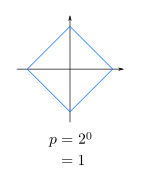

### Summary for Manhattan Distance Metric

| k-Nearest Neighbor | k-th point   | 1|2|3|4|5|6| 1-kNN|4-kNN|6-kNN
|------|------|
|   Raw Data | | B8|A10|C6|C15|A7|C9| **"B"**|**"C"**|**"C"**|
|   Normalized Data | |B8|A10|B2|C6|A4|A7|**"B"**|**"B"**|**"A"**|
|   Standardized Data ||B8|A10|B2|C6|C15|A4|**"B"**|**"B"**|**"B"**|

Regardless of scaling method used, each model with k=1 classifies the new instance as a member of the class "B".
This is due to chance as models trained with k=1 are unstable.(Adding just one more instance to the training set could drastically change results of the analysis). <br>
For k=6 each model classifies the new instance as a member of a different class. k=16 is too big considering that the training set consists of only 15 instances.(Overfitting)<br>
Possible causes:
* in the model trained on the raw data one (or more) of the features skewes the computation.(Results are misleading).
* models trained on normalized and standardized data agree with the first 4 nearest neighbors, however 5-th and 6th points are different. (It is worth noticing that 5-th, 6th and 7-th closest neighbors for both models consist of the same set of point in different order.) This disparity emphasizes the difference between two scaling methods: standardization preserves the structure of original data while normalization can distort variances between the instances.


## Eclidean Distance


The shortest path between two points.
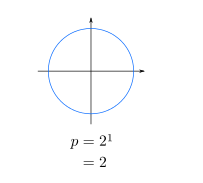

### Summary for Euclidean Distance Metric

| k-Nearest Neighbor | k-th point   | 1|2|3|4|5|6| 1-kNN|4-kNN|6-kNN
|------|------|
|   Raw Data | | B8|A10|C6|C15|A7|C9| **"B"**|**"C"**|**"C"**|
|   Normalized Data | |B8|A10|B2|C6|A4|A7|**"B"**|**"B"**|**"A"**|
|   Standardized Data ||B8|A10|B2|C6|C15|A4|**"B"**|**"B"**|**"B"**|

The results are similar to the outcomes attained using Manhattan Distance as a similarity function.

# Minkowski Distance with p=0.707

Minkowski Norm with p=1/2 is not a valid metric (fails triangle inequality). However, it is used to favor an instance (for example in 2D)
where the difference between the new example's first feature and an instance's first feature is small (assume 0.05) and the difference between their second feature is larger (assume 1.55) over another instance where both feature 1 and 2 are equally distant (here 0.8).

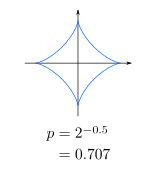



Chomboon, Kittipong, et al. “An Empirical Study of Distance Metrics for k-Nearest Neighbor Algorithm.” The Proceedings of the 2nd International Conference on Industrial Application Engineering 2015, 2015, doi:10.12792/iciae2015.051.

# Summary for Minkowski Norm p=0.707
|  k-Nearest Neighbor | k-th point   | 1|2|3|4|5|6|1-kNN|4-kNN|6-kNN
|------|------|
|   Raw Data | | B8|A10|C6|C15|A7|B2| **"B"**|**"C"**|**"B"***|
|   Normalized Data | |B8|A10|B2|C6|C15|A7| **"B"**|**"B"**|**"B"***|
|   Standardized Data ||B8|A10|B2|C6|C15|A7| **"B"**|**"B"**|**"B"***|

In a case of a tie, a label with an instance closer to the new example is chosen.
When Minkowski Norm with p=0.707 is applied as a similarity function the model train on standardized data and the model train on normalized data result in the same ordered list for the 6 closest neighbors. The disparity between these two different methods of scaling seems to be canceled by the choice of similarity function. (However, this behaviour is specific to the shape of this particular training data and should not be expected to generalize). 

# Minkowski Distance with p=2.828

Minkowski Norm with p=2.828.

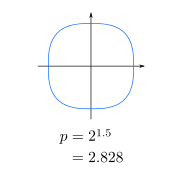

Chomboon, Kittipong, et al. “An Empirical Study of Distance Metrics for k-Nearest Neighbor Algorithm.” The Proceedings of the 2nd International Conference on Industrial Application Engineering 2015, 2015, doi:10.12792/iciae2015.051.


# Summary for Minkowski Norm p=2.828
|  k-Nearest Neighbor | k-th point   | 1|2|3|4|5|6|1-kNN|4-kNN|6-kNN
|------|------|
|   Raw Data | | C6|B8|A10|A13|C15|C9| **"C"**|**"A"**|**"C"**|
|   Normalized Data | |B8|A10|C6|A4|B2|C3| **"B"**|**"A"**|**"B"***|
|   Standardized Data ||B8|A10|C6|A4|B2|C3| **"B"**|**"A"**|**"B"***|

In a case of a tie, a label with an instance closer to the new example is chosen.
The model with k=1 and minkowski norm with =2.828 is first to classify the new instance as a member of a class "C".
This similarity function results in many ties on the provided dataset.

# Chebyshev Distance
Is a metric where the distance between two vectors is the greatest of their differences along any coordinate dimension.
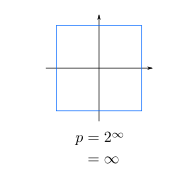


Chomboon, Kittipong, et al. “An Empirical Study of Distance Metrics for k-Nearest Neighbor Algorithm.” The Proceedings of the 2nd International Conference on Industrial Application Engineering 2015, 2015, doi:10.12792/iciae2015.051.


# Summary for Chebyshev 

| k-Nearest Neighbor | k-th point   | 1|2|3|4|5|6|1-kNN|4-kNN|6-kNN
|------|------|
|   Raw Data | | C6|B8|A10|A13|C9|C15| **"C"**|**"A"**|**"C"**|
|   Normalized Data | |B8|A10|C6|C9|A13|A4| **"B"**|**"C"**|**"A"**|
|   Standardized Data ||B8|A10|C6|C9|A4|A1| **"B"**|**"C"**|**"A"**|

In a case of a tie, a label with an instance closer to the new example is chosen.

The results are similar to the outcomes attained using Minkowski Norm with p=2.828 as a similarity function.
This means that the dataset does not contain any points in the area where the metrics differ.

# The following examples exhibit the influence of distance metric on the results of the classification

## Raw Data

| Method |1-kNN|4-kNN|6-kNN
|------|------|
| Minkowski p=0.707 | **"B"**|**"C"**|**"B"**|
|Manhattan | **"B"**|**"C"**|**"C"**|
|Euclidean| **"B"**|**"C"**|**"C"**|
| Minkowski p=2.828 | **"C"**|**"A"**|**"C"**|
| Chebyshev | **"C"**|**"A"**|**"C"**|

The results of classifiers trained on a raw data differ greatly from those trained on normalized or standardized  data. When features measured on different scales are used in distance computation they introduce error to results. 


## Normalized Data
| Method |1-kNN|4-kNN|6-kNN
|------|------|
| Minkowski p=0.707 | **"B"**|**"B"**|**"B"**|
|Manhattan | **"B"**|**"B"**|**"A"**|
|Euclidean| **"B"**|**"B"**|**"A"**|
| Minkowski p=2.828 | **"B"**|**"B"**|**"B"**|
| Chebyshev | **"B"**|**"C"**|**"A"**|

When k=1 or k=4 the new instance is consistently categorized as a member of class "B". However, when k=6 3 out of 5 models consider the new example as a member of class "A". (This might be a result of overfitting k=6 is too big given that the training set consists of only 15 examples.)



## Standardized Data
| Method |1-kNN|4-kNN|6-kNN
|------|------|
| Minkowski p=0.707 | **"B"**|**"B"**|**"B"**|
|Manhattan | **"B"**|**"B"**|**"B"**|
|Euclidean| **"B"**|**"B"**|**"B"**|
| Minkowski p=2.828 | **"B"**|**"A"**|**"B"**|
| Chebyshev | **"B"**|**"C"**|**"A"**|

Most models trained on standardized data categorize the new instance as a member of class "B" (6 out of 9).
Two of the exceptions are results of the model trained with Chebyshev metric. That model considers greatest difference between a single feature as a distance between a training instance and the new instance - only small subset of available information is considered. (Cheaper computationally but less accurate.)


<br>
<br>
<br>
<br>
<br>
<br>

# CALCULATIONS WITH DESCRIPTIONS

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn.neighbors import NearestNeighbors

## Traing Data

The provided dataset has 4 numeric features and a nominal class label (A, B or C)

In [11]:
data=pd.read_csv('hw1.txt')

## RAW DATA

Is not recommended to use kNN on raw data because different features are often measured on different scales. In case of kNN the features with big values would dominate the calculation. (Tree- based classification algorithms are  scale-invariant.)

In [12]:
data_raw=data.copy()
data_raw

,data1,data2,data3,data4,class
0,5.1,3.5,1.4,0.2,A1
1,4.9,3.0,1.4,0.2,B2
2,4.7,3.2,1.3,0.2,C3
3,4.6,3.1,1.5,0.2,A4
4,5.0,3.6,1.4,0.2,B5
5,5.5,2.3,4.0,1.3,C6
6,6.5,2.8,4.6,1.5,A7
7,5.7,2.8,4.5,1.3,B8
8,6.3,3.3,4.7,1.6,C9
9,4.9,2.4,3.3,1.0,A10


## New Instance to Classify (Raw Data)

In [26]:
example_raw=np.array([5.0,2.9,4.2,0.7])

## NORMALIZED DATA

Min-max normalization is used to transform data onto [0,1] range. However, using this method decreases the standard deviation among the points and supresses outliers. 

In [97]:
data_normalized = data.copy()
max_col_val=data_normalized.max()
min_col_val=data_normalized.min()
# new example does not include max or min value for any of the features

for i in range(len(data_normalized)):
    data_normalized["data1"][i] = (data_normalized["data1"][i]- min_col_val[0])/(max_col_val[0]-min_col_val[0])
    data_normalized["data2"][i] = (data_normalized["data2"][i]- min_col_val[1])/(max_col_val[1]-min_col_val[1])
    data_normalized["data3"][i] = (data_normalized["data3"][i]- min_col_val[2])/(max_col_val[2]-min_col_val[2])
    data_normalized["data4"][i] = (data_normalized["data4"][i]- min_col_val[3])/(max_col_val[3]-min_col_val[3])

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentat

In [98]:
data_normalized

,data1,data2,data3,data4,class
0,0.161290,0.8125,0.017857,0.000000,A1
1,0.096774,0.5000,0.017857,0.000000,B2
2,0.032258,0.6250,0.000000,0.000000,C3
3,0.000000,0.5625,0.035714,0.000000,A4
4,0.129032,0.8750,0.017857,0.000000,B5
5,0.290323,0.0625,0.482143,0.523810,C6
6,0.612903,0.3750,0.589286,0.619048,A7
7,0.354839,0.3750,0.571429,0.523810,B8
8,0.548387,0.6875,0.607143,0.666667,C9
9,0.096774,0.1250,0.357143,0.380952,A10


## New Instance to Classify (Normalized Data)

In [28]:
example_normalized=example_raw.copy()

example_normalized[0] = (example_normalized[0]- min_col_val[0])/(max_col_val[0]-min_col_val[0])
example_normalized[1] = (example_normalized[1]- min_col_val[1])/(max_col_val[1]-min_col_val[1])
example_normalized[2] = (example_normalized[2]- min_col_val[2])/(max_col_val[2]-min_col_val[2])
example_normalized[3] = (example_normalized[3]- min_col_val[3])/(max_col_val[3]-min_col_val[3])
example_normalized

array([ 0.12903226,  0.4375    ,  0.51785714,  0.23809524])

## Z-NORMALIZED (STANDARDIZED) DATA 

This method centers the data at 0. If all the features are z-normalized they contribute equally to kNN algorithm.


In [105]:
data_plus_new=pd.read_csv('hw1.txt')

In [107]:
mean_col_val=data_plus_new.mean()
std_col_val=data_plus_new.std()
data_standardized=data.copy()


for i in range(len(data_normalized)):
    data_standardized["data1"][i] = (data_standardized["data1"][i]- mean_col_val[0])/(std_col_val[0])
    data_standardized["data2"][i] = (data_standardized["data2"][i]- mean_col_val[1])/(std_col_val[1])
    data_standardized["data3"][i] = (data_standardized["data3"][i]- mean_col_val[2])/(std_col_val[2])
    data_standardized["data4"][i] = (data_standardized["data4"][i]- mean_col_val[3])/(std_col_val[3])

/usr/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentat

In [108]:
data_standardized

,data1,data2,data3,data4,class
0,-0.648527,1.151202,-1.270910,-1.205029,A1
1,-0.846174,0.067718,-1.270910,-1.205029,B2
2,-1.043820,0.501112,-1.322917,-1.205029,C3
3,-1.142643,0.284415,-1.218904,-1.205029,A4
4,-0.747350,1.367899,-1.270910,-1.205029,B5
5,-0.253234,-1.449160,0.081260,0.163262,C6
6,0.734997,-0.365676,0.393300,0.412042,A7
7,-0.055588,-0.365676,0.341293,0.163262,B8
8,0.537351,0.717808,0.445306,0.536432,C9
9,-0.846174,-1.232464,-0.282786,-0.209908,A10


## New Instance to Classify (Standardized Data)

In [109]:
example_standardized=example_raw.copy()

example_standardized[0] = (example_standardized[0]- mean_col_val[0])/(std_col_val[0])
example_standardized[1] = (example_standardized[1]- mean_col_val[1])/(std_col_val[1])
example_standardized[2] = (example_standardized[2]- mean_col_val[2])/(std_col_val[2])
example_standardized[3] = (example_standardized[3]- mean_col_val[3])/(std_col_val[3])
example_standardized

array([-0.74735036, -0.14897911,  0.18527338, -0.58307847])

## Manhattan Distance


In [20]:

# manhattan_distance(data, number_of_features, example ):
# Calculates Manhattan Distance between training data and a new example.
# @param  Data Frame [in]  data  - training data, one instance per row,
#         int        [in]  number_of_features  - number of numeric features per istance (not including class),
#         array int  [in]  example  - data to classify
# @pre   data contains numerical features followed by a label in the last column, 
#        example has the same number of numeric features as training instances 
# @post   distance between each training instance and the example is calculated
# @returns array of (distance, class) tuples sorted by distance (ascending)
#/

def manhattan_distance(data, number_of_features, example ):
    results_manhattan=[]
    for i in range(len(data)):
        row = data.iloc[i]
        sum = 0
        for j in range(number_of_features):
            sum= sum + abs(row[j]-example[j])
        tup=(sum, row[j+1])
        results_manhattan.append(tup)
    results_manhattan.sort()  
    print(results_manhattan)
        

In [21]:
manhattan_distance(data_raw, 4, example_raw)

[(1.7000000000000002, 'B8'), (1.8, 'A10'), (1.9000000000000004, 'C6'), (2.7000000000000002, 'C15'), (2.7999999999999998, 'A7'), (3.0999999999999996, 'C9'), (3.2999999999999998, 'A13'), (3.5, 'B2'), (3.8000000000000007, 'A4'), (4.0, 'A1'), (4.0, 'B5'), (4.0, 'C3'), (5.3000000000000007, 'B14'), (7.2999999999999998, 'C12'), (7.5999999999999996, 'B11')]


In [22]:
manhattan_distance(data_normalized, 4, example_normalized)

[(0.62759216589861766, 'B8'), (0.64832949308755772, 'A10'), (0.83285330261136714, 'B2'), (0.85771889400921686, 'C6'), (0.97427035330261169, 'A4'), (0.99875192012288783, 'A7'), (1.0000960061443933, 'C15'), (1.0402265745007682, 'C3'), (1.1453533026113674, 'A1'), (1.1755952380952384, 'B5'), (1.1872119815668203, 'C9'), (1.2838901689708142, 'A13'), (1.8301651305683564, 'B14'), (2.3025153609831026, 'C12'), (2.5941820276497696, 'B11')]


In [110]:
manhattan_distance(data_standardized, 4, example_standardized)

[(1.8108193256368077, 'B8'), (2.023536917830167, 'A10'), (2.3936541757855325, 'B2'), (2.6446508436419252, 'C6'), (2.7907528952880476, 'C15'), (2.8548140672360063, 'A4'), (2.902191532820146, 'A7'), (3.0767008945576375, 'C3'), (3.4771386306264054, 'A1'), (3.5310324654889413, 'C9'), (3.5950123341309697, 'B5'), (3.9162831889452749, 'A13'), (5.2980708278684867, 'B14'), (6.7127350704797797, 'C12'), (7.7845132196888001, 'B11')]


## Eclidean Distance



In [47]:
def euclidean_distance(data, number_of_features, example ):
    results_euclidean=[]
    for i in range(len(data)):
        row = data.iloc[i]
        sum = 0
        for j in range(number_of_features):
            sum= sum + ((row[j]-example[j])*(row[j]-example[j]))
        sum=np.sqrt(sum)
        tup=(sum, row[j+1])
        results_euclidean.append(tup)
    results_euclidean.sort()  
    print(results_euclidean)

In [48]:
euclidean_distance(data_raw, 4, example_raw)

[(0.97467943448089656, 'B8'), (1.0049875621120892, 'C6'), (1.077032961426901, 'A10'), (1.5968719422671311, 'C15'), (1.6643316977093237, 'A13'), (1.7058722109231981, 'C9'), (1.7492855684535902, 'A7'), (2.7820855486487113, 'A4'), (2.8478061731796287, 'B2'), (2.9086079144497976, 'A1'), (2.9171904291629644, 'B14'), (2.9291637031753623, 'B5'), (2.9732137494637012, 'C3'), (4.0743097574926725, 'B11'), (4.150903516103452, 'C12')]


In [49]:
euclidean_distance(data_normalized, 4, example_normalized)

[(0.37335955138501364, 'B8'), (0.38070208513256931, 'A10'), (0.49954752669137992, 'C6'), (0.5582438312511433, 'B2'), (0.56694391320370807, 'A4'), (0.60777204390193218, 'C3'), (0.62310843421761808, 'A7'), (0.65574681769146614, 'C9'), (0.66348487759427421, 'C15'), (0.66959310415352635, 'A1'), (0.67896789500775978, 'A13'), (0.70575887695701589, 'B5'), (1.0310445816727316, 'B14'), (1.2675573590174232, 'C12'), (1.3358493958948381, 'B11')]


In [111]:
euclidean_distance(data_standardized, 4, example_standardized)

[(1.0520735853457757, 'B8'), (1.2417889833341578, 'A10'), (1.5819180980309653, 'C6'), (1.6012547847365488, 'B2'), (1.6439654231550886, 'A4'), (1.7736916966661413, 'C15'), (1.7810031742183252, 'C3'), (1.8104840433182767, 'A7'), (1.9294298722640966, 'C9'), (2.0512266756934117, 'A1'), (2.1073410913563371, 'A13'), (2.1927637597138285, 'B5'), (2.9185211004331379, 'B14'), (3.670806671616599, 'C12'), (4.0118347560521901, 'B11')]


## Minkowski Distance with p=0.707


In [56]:
def minkowski_distance(data, number_of_features, example,p ):
    results_minkowski=[]
    for i in range(len(data)):
        row = data.iloc[i]
        sum = 0
        for j in range(number_of_features):
            sum= sum + np.power(abs(row[j]-example[j]), p)
        sum=np.power(sum, (1/p))
        tup=(sum, row[j+1])
        results_minkowski.append(tup)
    results_minkowski.sort()  
    print(results_minkowski)

## Results of Classification using Minkowski Norm (p=0.707) and Raw Data

In [64]:
minkowski_distance(data_raw, 4, example_raw,0.707)

[(2.8506370183951262, 'B8'), (2.9799535974451685, 'A10'), (3.3018976900840964, 'C6'), (4.4516822957102038, 'C15'), (4.5206725525899349, 'A7'), (4.9004559829221108, 'B2'), (5.3379931142803896, 'C9'), (5.7886309592183736, 'B5'), (5.8218001700825655, 'A4'), (5.8471582090371905, 'A13'), (6.0652084032632043, 'A1'), (6.0954714358115112, 'C3'), (8.9989473910742159, 'B14'), (12.186488343509605, 'C12'), (13.175567938556654, 'B11')]


## Results of Classification using Minkowski Norm (p=0.707) and Normalized Data

In [65]:
minkowski_distance(data_normalized, 4, example_normalized,0.707)

[(1.040907836624714, 'B8'), (1.0784716590774692, 'A10'), (1.3005864661069491, 'B2'), (1.4215961101442187, 'C6'), (1.6034925404406315, 'C15'), (1.6088353353992171, 'A7'), (1.6496035229524306, 'A4'), (1.7553704706185997, 'C3'), (1.8291662543982454, 'B5'), (1.8811616878123407, 'A1'), (2.0249674413368384, 'C9'), (2.2333590725520773, 'A13'), (3.1146714347748574, 'B14'), (3.9375915718113776, 'C12'), (4.5667370521505468, 'B11')]


## Results of Classification using Minkowski Norm (p=0.707) and Standarlized Data

In [112]:
minkowski_distance(data_standardized, 4, example_standardized,0.707 )

[(3.0342829686427746, 'B8'), (3.3199228275366091, 'A10'), (3.764906989859953, 'B2'), (4.3475452038754367, 'C6'), (4.5622103551724278, 'C15'), (4.69907465337345, 'A7'), (4.8610501737044762, 'A4'), (5.21128801833013, 'C3'), (5.5562310626978855, 'B5'), (5.6877686868238886, 'A1'), (6.041169920008759, 'C9'), (6.7775087459798637, 'A13'), (9.0990247404595515, 'B14'), (11.542440162399997, 'C12'), (13.700504319502254, 'B11')]


## Minkowski Distance with p=2.828


## Results of Classification using Minkowski Norm (p=2.828) and Raw Data

In [69]:
minkowski_distance(data_raw, 4, example_raw,2.828)

[(0.84594583187721206, 'C6'), (0.85175875245511301, 'B8'), (0.9701457774055734, 'A10'), (1.3685953395850678, 'A13'), (1.4211884653827338, 'C15'), (1.4847769725849334, 'C9'), (1.5967267154817457, 'A7'), (2.4836168573081641, 'B14'), (2.7129650688161546, 'A4'), (2.8077228591849073, 'B2'), (2.8202262989758178, 'A1'), (2.826980084012245, 'B5'), (2.9104310716171771, 'C3'), (3.4734838544207149, 'B11'), (3.5851380277818889, 'C12')]


## Results of Classification using Minkowski Norm (p=2.828) and Normalized Data

In [70]:
minkowski_distance(data_normalized, 4, example_normalized,2.828)

[(0.33256996054322518, 'B8'), (0.33943730477039574, 'A10'), (0.4385319494423619, 'C6'), (0.51150836188129489, 'A4'), (0.52141166769072589, 'B2'), (0.5484647855058169, 'C3'), (0.56056900029276213, 'A7'), (0.56363380523086171, 'C9'), (0.57262095391575563, 'A13'), (0.58598593971590995, 'A1'), (0.61649704553057516, 'B5'), (0.62975604420035036, 'C15'), (0.90192180427955371, 'B14'), (1.0899798647418613, 'C12'), (1.1152767894986924, 'B11')]


## Results of Classification using Minkowski Norm (p=2.828) and Standardized Data

In [113]:
minkowski_distance(data_standardized, 4, example_standardized,2.828 )

[(0.9275246338433013, 'B8'), (1.1360481323216385, 'A10'), (1.416308164520699, 'C6'), (1.4815057560313398, 'A4'), (1.503799371100218, 'B2'), (1.6011417925707263, 'C3'), (1.6405950354358483, 'A7'), (1.646488090324927, 'C9'), (1.6599017776311207, 'C15'), (1.798390862047017, 'A1'), (1.8017747174191043, 'A13'), (1.9283089174298123, 'B5'), (2.5254482325403078, 'B14'), (3.162910560692866, 'C12'), (3.3522211507826509, 'B11')]


## Chebyshev Distance


In [84]:
def chebyshev_distance(data, number_of_features, example ):
    results_chebyshev=[]
    for i in range(len(data)):
        row = data.iloc[i]
        results=[]
        for j in range(number_of_features):
            difference=abs(row[j]-example[j])
            results.append(difference)
        current_max=max(results)
        tup=(current_max, row[j+1])
        results_chebyshev.append(tup)
    results_chebyshev.sort()  
    print(results_chebyshev)

In [85]:
chebyshev_distance(data_raw, 4, example_raw )

[(0.60000000000000009, 'C6'), (0.70000000000000018, 'B8'), (0.90000000000000036, 'A10'), (1.0, 'A13'), (1.2999999999999998, 'C9'), (1.3, 'C15'), (1.5, 'A7'), (1.9000000000000004, 'B14'), (2.7000000000000002, 'A4'), (2.7000000000000002, 'B11'), (2.7000000000000002, 'C12'), (2.8000000000000003, 'A1'), (2.8000000000000003, 'B2'), (2.8000000000000003, 'B5'), (2.9000000000000004, 'C3')]


In [86]:
chebyshev_distance(data_normalized, 4, example_normalized )

[(0.28571428571428581, 'B8'), (0.31250000000000011, 'A10'), (0.37500000000000017, 'C6'), (0.42857142857142871, 'C9'), (0.43749999999999994, 'A13'), (0.48214285714285721, 'A4'), (0.48387096774193539, 'A7'), (0.50000000000000011, 'A1'), (0.50000000000000011, 'B2'), (0.50000000000000011, 'B5'), (0.5178571428571429, 'C3'), (0.61904761904761918, 'C15'), (0.76190476190476186, 'B14'), (0.87096774193548376, 'B11'), (0.87096774193548376, 'C12')]


In [114]:
chebyshev_distance(data_standardized, 4, example_standardized)

[(0.74634043669775574, 'B8'), (1.0834844548408729, 'A10'), (1.2847014370269396, 'C9'), (1.3001813458090477, 'C6'), (1.4041771715304172, 'A4'), (1.4561837334389514, 'A1'), (1.4561837334389514, 'B2'), (1.4823478119541613, 'A7'), (1.5081902953474851, 'C3'), (1.5168782367772216, 'A13'), (1.5168782367772222, 'B5'), (1.6170709461784705, 'C15'), (1.9902411645273481, 'B14'), (2.6682260615174904, 'B11'), (2.6682260615174904, 'C12')]
